In [1]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

from datetime import datetime
%matplotlib widget


import pandas_ta as ta

In [2]:
def ohlc_data_fetch(symbol='BTCUSDT', timeframe='5m'):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
    # Eliminate last row
    ohlcv = ohlcv[:-1]
    
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    return df

exchange = ccxt.binance()
symbol = 'XLM/USDT'
tf = '5m'

df = ohlc_data_fetch(symbol=symbol, timeframe=tf)
df.tail()

,open,high,low,close,volume
timestamp,,,,,
2023-07-07 21:25:00,0.0964,0.0965,0.0964,0.0964,43210.0
2023-07-07 21:30:00,0.0964,0.0965,0.0963,0.0963,72863.0
2023-07-07 21:35:00,0.0964,0.0964,0.0963,0.0963,93435.0
2023-07-07 21:40:00,0.0964,0.0964,0.0962,0.0964,121433.0
2023-07-07 21:45:00,0.0963,0.0964,0.0962,0.0963,35595.0


## Adding Indicators

In [3]:
## Green Candle
df['green_candle'] = df['close'] > df['open']
df['red_candle'] = df['green_candle'] != 1

## EMA 10
df['ema10'] = ta.ema(df.close, timeperiod=10)

# ta.ema
## ATR 
df.tail()

,open,high,low,close,volume,green_candle,red_candle,ema10
timestamp,,,,,,,,
2023-07-07 21:00:00,0.0964,0.0966,0.0964,0.0965,68023.0,True,False,0.096455
2023-07-07 21:05:00,0.0965,0.0966,0.0964,0.0965,41285.0,False,True,0.096463
2023-07-07 21:10:00,0.0965,0.0966,0.0965,0.0965,50789.0,False,True,0.096470
2023-07-07 21:15:00,0.0965,0.0966,0.0965,0.0966,56723.0,True,False,0.096493
2023-07-07 21:20:00,0.0965,0.0966,0.0964,0.0964,86035.0,False,True,0.096476


## Buy Conditions

In [4]:
df['open_n-1'] = df['open'].shift()
df['high_n-1'] = df['high'].shift()
df['low_n-1'] = df['low'].shift()
df['close_n-1'] = df['close'].shift()
df['ema10_n-1'] = df['ema10'].shift()
df['green_candle_n-1'] = df['green_candle'].shift()
df['red_candle_n-1'] = df['red_candle'].shift()

df['open_n-2'] = df['open'].shift(2)
df['high_n-2'] = df['high'].shift(2)
df['low_n-2'] = df['low'].shift(2)
df['close_n-2'] = df['close'].shift(2)
df['ema10_n-2'] = df['ema10'].shift(2)
df['green_candle_n-2'] = df['green_candle'].shift(2)
df['red_candle_n-2'] = df['red_candle'].shift(2)

df['open_n-3'] = df['open'].shift(3)
df['high_n-3'] = df['high'].shift(3)
df['low_n-3'] = df['low'].shift(3)
df['close_n-3'] = df['close'].shift(3)
df['ema10_n-3'] = df['ema10'].shift(3)
df['green_candle_n-3'] = df['green_candle'].shift(3)
df['red_candle-3'] = df['red_candle'].shift(3)

# df['open_n-4'] = df['open'].shift(4)
# df['high_n-4'] = df['high'].shift(4)
# df['low_n-4'] = df['low'].shift(4)
# df['close_n-4'] = df['close'].shift(4)
# df['ema10_n-4'] = df['ema10'].shift(4)
# df['green_candle-4'] = df['green_candle'].shift(4)
# df['red_candle-4'] = df['red_candle'].shift(4)

# df['open_n-5'] = df['open'].shift(5)
# df['high_n-5'] = df['high'].shift(5)
# df['low_n-5'] = df['low'].shift(5)
# df['close_n-5'] = df['close'].shift(5)
# df['ema10_n-5'] = df['ema10'].shift(5)
# df['green_candle-5'] = df['green_candle'].shift(5)
# df['red_candle-5'] = df['red_candle'].shift(5)

df.tail()

,open,high,low,close,volume,green_candle,red_candle,ema10,open_n-1,high_n-1,...,ema10_n-2,green_candle_n-2,red_candle_n-2,open_n-3,high_n-3,low_n-3,close_n-3,ema10_n-3,green_candle_n-3,red_candle-3
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-07 21:00:00,0.0964,0.0966,0.0964,0.0965,68023.0,True,False,0.096455,0.0963,0.0964,...,0.096477,False,True,0.0963,0.0964,0.0962,0.0963,0.096494,False,True
2023-07-07 21:05:00,0.0965,0.0966,0.0964,0.0965,41285.0,False,True,0.096463,0.0964,0.0966,...,0.096444,False,True,0.0964,0.0964,0.0963,0.0964,0.096477,False,True
2023-07-07 21:10:00,0.0965,0.0966,0.0965,0.0965,50789.0,False,True,0.096470,0.0965,0.0966,...,0.096455,True,False,0.0963,0.0964,0.0962,0.0963,0.096444,False,True
2023-07-07 21:15:00,0.0965,0.0966,0.0965,0.0966,56723.0,True,False,0.096493,0.0965,0.0966,...,0.096463,False,True,0.0964,0.0966,0.0964,0.0965,0.096455,True,False
2023-07-07 21:20:00,0.0965,0.0966,0.0964,0.0964,86035.0,False,True,0.096476,0.0965,0.0966,...,0.096470,False,True,0.0965,0.0966,0.0964,0.0965,0.096463,False,True


In [5]:
# 1. Check market is bullish -> candles above 10 ema (May be multiple green candle above of 10 ema)
df['cond1'] = ( 
                (df['low_n-1'] > df['ema10_n-1']) & (df['low_n-2'] > df['ema10_n-2']) &\
                (df['green_candle_n-1']==True) & (df['green_candle_n-2']==True) 
            ) |\
            (
                (df['low_n-1'] > df['ema10_n-1']) & (df['low_n-2'] > df['ema10_n-2']) & (df['low_n-3'] > df['ema10_n-3'])&\
                (df['green_candle_n-1']==False) & (df['green_candle_n-2']==True) & (df['green_candle_n-3']==True) 
            )

# 2. Previous candle (n-1) is red
df['cond2'] = ( (df['red_candle']==True) & (df['low'] > df['ema10']) )

# # 3. Current price (red/green) previos candle high
# df['cond3'] = df['open'] > df['close']

In [6]:
df['buy'] = (df['cond1'] 
             & 
             df['cond2'])
df['buy_price'] = np.where(df['buy']==1, df['close'], np.nan)
df['stoploss'] = np.where(df['buy']==1, df['low_n-1'], np.nan)
df['takeprofit'] = np.where(df['buy']==1, df['close'] + (df['close'] - df['stoploss'])*2.5, np.nan)

df[df['buy']==1]

,open,high,low,close,volume,green_candle,red_candle,ema10,open_n-1,high_n-1,...,close_n-3,ema10_n-3,green_candle_n-3,red_candle-3,cond1,cond2,buy,buy_price,stoploss,takeprofit
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-06 06:35:00,0.1002,0.1003,0.1001,0.1001,71719.0,False,True,0.099909,0.1001,0.1003,...,0.0999,0.099724,False,True,True,True,True,0.1001,0.1001,0.10010
2023-07-06 06:40:00,0.1001,0.1002,0.1000,0.1001,63710.0,False,True,0.099944,0.1002,0.1003,...,0.1001,0.099792,True,False,True,True,True,0.1001,0.1001,0.10010
2023-07-06 07:15:00,0.1006,0.1007,0.1004,0.1005,155442.0,False,True,0.100382,0.1006,0.1008,...,0.1004,0.100208,False,True,True,True,True,0.1005,0.1006,0.10025
2023-07-06 07:40:00,0.1010,0.1011,0.1009,0.1010,65053.0,False,True,0.100710,0.1009,0.1011,...,0.1007,0.100487,True,False,True,True,True,0.1010,0.1008,0.10150
2023-07-06 08:40:00,0.1015,0.1016,0.1013,0.1015,113526.0,False,True,0.101079,0.1013,0.1016,...,0.1009,0.100803,False,True,True,True,True,0.1015,0.1013,0.10200
2023-07-06 09:05:00,0.1021,0.1021,0.1019,0.1020,143659.0,False,True,0.101592,0.1019,0.1023,...,0.1017,0.101299,False,True,True,True,True,0.1020,0.1018,0.10250
2023-07-06 09:10:00,0.1020,0.1023,0.1019,0.1020,288260.0,False,True,0.101666,0.1021,0.1021,...,0.1018,0.101390,True,False,True,True,True,0.1020,0.1019,0.10225
2023-07-06 09:30:00,0.1021,0.1022,0.1019,0.1020,107811.0,False,True,0.101887,0.1020,0.1022,...,0.1021,0.101745,True,False,True,True,True,0.1020,0.1020,0.10200
2023-07-06 15:40:00,0.0986,0.0986,0.0985,0.0985,86994.0,False,True,0.098256,0.0985,0.0987,...,0.0983,0.098028,True,False,True,True,True,0.0985,0.0985,0.09850


In [4]:
%matplotlib inline

import backtrader as bt

class SMACrossover(bt.Strategy):
    params = (
        ('ema10', 10)
    )

    def __init__(self):
        self.ema10 = bt.indicators.ExponentialMovingAverage(self.data.close, period=self.params.ema10)
        self.open_n_1 = df['open'].shift()
        self.high_n_1 = df['high'].shift()
        df['low_n-1'] = df['low'].shift()
        df['close_n-1'] = df['close'].shift()
        df['ema10_n-1'] = df['ema10'].shift()
        df['green_candle_n-1'] = df['green_candle'].shift()
        df['red_candle_n-1'] = df['red_candle'].shift()

        df['open_n-2'] = df['open'].shift(2)
        df['high_n-2'] = df['high'].shift(2)
        df['low_n-2'] = df['low'].shift(2)
        df['close_n-2'] = df['close'].shift(2)
        df['ema10_n-2'] = df['ema10'].shift(2)
        df['green_candle_n-2'] = df['green_candle'].shift(2)
        df['red_candle_n-2'] = df['red_candle'].shift(2)

        df['open_n-3'] = df['open'].shift(3)
        df['high_n-3'] = df['high'].shift(3)
        df['low_n-3'] = df['low'].shift(3)
        df['close_n-3'] = df['close'].shift(3)
        df['ema10_n-3'] = df['ema10'].shift(3)
        df['green_candle_n-3'] = df['green_candle'].shift(3)
        df['red_candle-3'] = df['red_candle'].shift(3)
        
                        
    def next(self):
        if self.fast_sma[0] > self.slow_sma[0] and self.fast_sma[-1] <= self.slow_sma[-1]:
            self.buy()
        elif self.fast_sma[0] < self.slow_sma[0] and self.fast_sma[-1] >= self.slow_sma[-1]:
            self.sell()

cerebro = bt.Cerebro()

# data = bt.feeds.YahooFinanceData(dataname='AAPL', fromdate=datetime(2019, 1, 1), todate=datetime(2020, 12, 31))
data = ohlc_data_fetch(symbol='BTCUSDT', timeframe='5m')
feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(feed)
cerebro.addstrategy(SMACrossover)

cerebro.run()

cerebro.plot()

<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]

In [ ]:
!jupyter labextension install jupyter-matplotlib





Building jupyterlab assets (production, minimized)
/

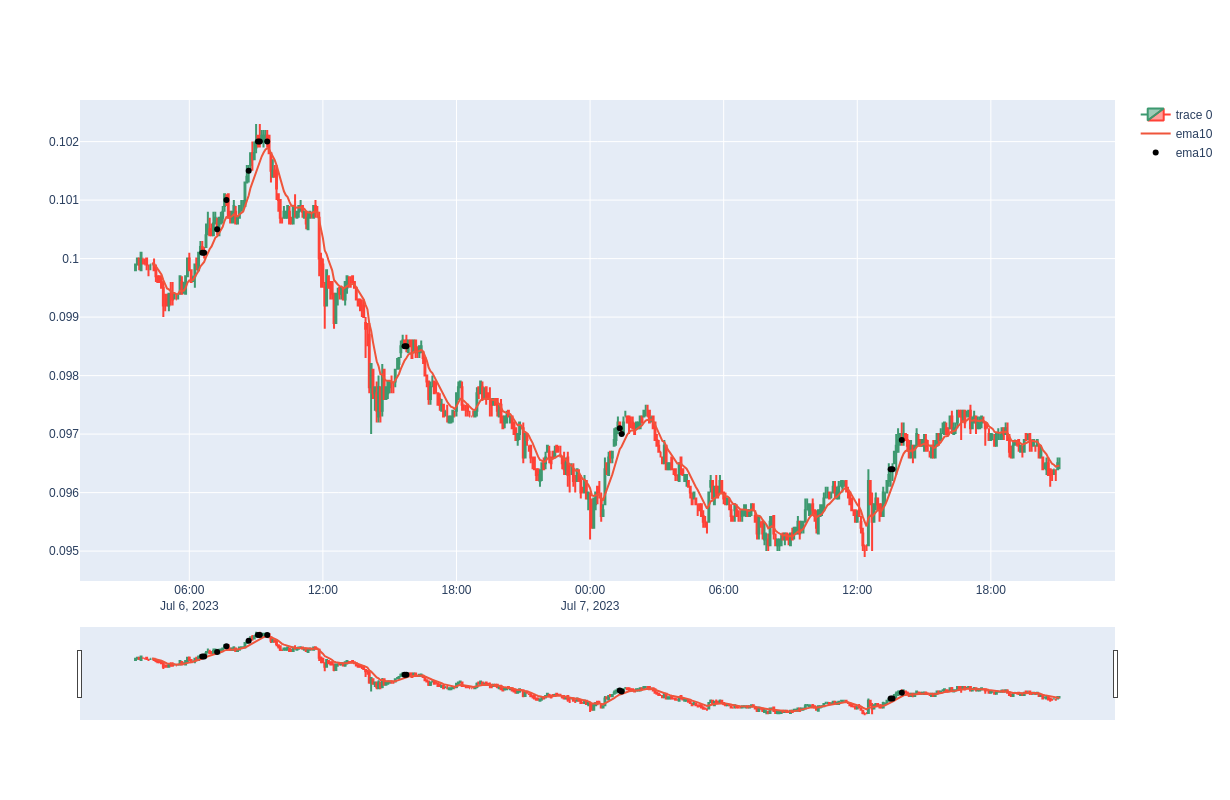

In [19]:
# df = df[:int(len(df)/2)]

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

ema_trace = go.Scatter(x=df.index, y=df['ema10'], mode='lines', name='ema10')
fig.add_trace(ema_trace)

buy_trace = go.Scatter(x=df.index, y=df['buy_price'], mode='markers', name='ema10', line=dict(width=3, color="black"),)
fig.add_trace(buy_trace)

fig.update_layout(
    width=1400,  # Set the width to 800 pixels
    height=800  # Set the height to 600 pixels
)

fig.show()


In [9]:
### Calculate essentials

total_amt_usd = 100

buy_size_usd = 20
entry_base_currency = 280.3

# To calculate the quantity of BCH you would get from buying $20 USD at an exchange rate of 1 USD = 280.3 BCH, you can use the following formula:
qty_base_currency = buy_size_usd / entry_base_currency

# Stoploss (previous red candle low)
stoploss_base_currency = 279.3

# Takeprofit 1:2.5 RR
risk_usd = entry_base_currency - stoploss_base_currency 
reward_usd = risk_usd*2.5
takeprofit = entry_base_currency + reward_usd



print("Qty: ", qty_base_currency)
print("Risk usd: ", risk_usd)
print("Reward usd: ", reward_usd)
print()

print("TP: ", takeprofit)
print("EP: ", entry_base_currency)
print("SL: ", stoploss_base_currency)

Qty:  0.07135212272565108
Risk usd:  1.0
Reward usd:  2.5

TP:  282.8
EP:  280.3
SL:  279.3


In [10]:
def calculate_entry_tp_sl(buy_size_usd, entry_base_currency, stoploss, rr=2.5):
    # 1. Calculate qty of base aginst quote pair (e.g; BTC/USDT how many qty of BTC we get from 50 USDT.)
    qty_base_currency = buy_size_usd / entry_base_currency
    
    # 2. Calculate stoploss
    ## For now @ 10 ema of last red candle -> 1. Last developed candle is red and completely above 10 ema
    stoploss_base_currency = stoploss
    
    # 3. Take Profit
    # Takeprofit 1:2.5 RR
    risk_usd = entry_base_currency - stoploss_base_currency 
    reward_usd = risk_usd*rr
    takeprofit = entry_base_currency + reward_usd
    
    return qty_base_currency, stoploss_base_currency, takeprofit

calculate_entry_tp_sl(buy_size_usd=20, entry_base_currency=280, stoploss=279.5, rr=2.5)

(0.07142857142857142, 279.5, 281.25)

In [ ]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

from datetime import datetime

import pandas_ta as ta

import backtrader as bt

exchange = ccxt.binance()

def ohlc_data_fetch(symbol='BTCUSDT', timeframe='5m'):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
    # Eliminate last row
    ohlcv = ohlcv[:-1]
    
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    return df

class SMACrossover(bt.Strategy):
    params = (
        ('fast_period', 10),
        ('slow_period', 30),
    )

    def __init__(self):
        self.fast_sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.fast_period)
        self.slow_sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.slow_period)

    def next(self):
        if self.fast_sma[0] > self.slow_sma[0] and self.fast_sma[-1] <= self.slow_sma[-1]:
            self.buy()
        elif self.fast_sma[0] < self.slow_sma[0] and self.fast_sma[-1] >= self.slow_sma[-1]:
            self.sell()

cerebro = bt.Cerebro()

# data = bt.feeds.YahooFinanceData(dataname='AAPL', fromdate=datetime(2019, 1, 1), todate=datetime(2020, 12, 31))
data = ohlc_data_fetch(symbol='BTCUSDT', timeframe='5m')
feed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(feed)
cerebro.addstrategy(SMACrossover)

cerebro.run()

cerebro.plot()